In [23]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
from scipy.ndimage import zoom
from scipy.optimize import minimize_scalar
from cued_sf2_lab.familiarisation import load_mat_img, plot_image

In [24]:
lighthouse, _ = load_mat_img(img='lighthouse.mat', img_info='X')
bridge, _ = load_mat_img(img='bridge.mat', img_info='X')
flamingo, _ = load_mat_img(img='flamingo.mat', img_info='X')
lena, _ = load_mat_img(img='lena.mat', img_info='image')
peppers, _ = load_mat_img(img='peppers.mat', img_info='image')
columbia, _ = load_mat_img(img='columbia.mat', img_info='image')
camera, _ = load_mat_img(img='camera.mat', img_info='image')
lake, _ = load_mat_img(img='lake.mat', img_info='image')
baboon, _ = load_mat_img(img='baboon.mat', img_info='image')
couple, _ = load_mat_img(img='couple.mat', img_info='image')
plane, _ = load_mat_img(img='plane.mat', img_info='image')
peppers = zoom(peppers, 256/512)
columbia = zoom(columbia, 256/480)
lena = zoom(lena, 256/512)
baboon = zoom(baboon, 256/512)
plane = zoom(plane, 256/512)
lake = zoom(lake, 256/512)
couple = zoom(couple, 256/512)

In [25]:
lighthouse = lighthouse - 128.0
flamingo = flamingo - 128.0
bridge = bridge - 128.0
lena = lena - 128.0
peppers = peppers - 128.0
columbia = columbia - 128.0
camera = camera - 128.0
baboon = baboon - 128.0
plane = plane - 128.0
lake = lake - 128.0
couple = couple - 128.0

In [26]:
image = lake
target_bits = 40960

In [27]:
from skimage.metrics import structural_similarity as ssim_comp
import sewar

# Structural Similarity Index (SSIM)
def ssim_index(imageA, imageB):
    return ssim_comp(imageA, imageB, multichannel=True)

# Visual Information Fidelity
def vif_index(imageA, imageB):
    return sewar.full_ref.vifp(imageA, imageB)

In [28]:
# from cued_sf2_lab.jpeg_dwt_param import jpegdec_dwt, jpegenc_dwt, objective_function_dwt

In [29]:
# n = 3
# M = 8 #2**n
# rise = 1
# step = (minimize_scalar(objective_function_dwt, bounds=(1, 20), args=(image, rise, target_bits, n, M, True), method='bounded')).x

# vlc, hufftab, totalbits = jpegenc_dwt(image, step, rise, n, M, opthuff=True)
# print(totalbits)
# Z = jpegdec_dwt(vlc, step, rise, n, M, hufftab=hufftab)
# fig, ax = plt.subplots()
# plot_image(Z, ax=ax);

In [30]:
# rmse = np.std(Z-image)
# ssim = ssim_comp(Z, image, data_range=256)
# vif = vif_index(Z, image)
# print(rmse, ssim, vif)

In [31]:
from cued_sf2_lab.jpeg_lbt_2 import jpegdec_lbt2, jpegenc_lbt2, objective_function_lbt2

Forward 4 x 4 LBT
Second 4 x 4 LBT on low-pass image
Performing frequency dependent quantisation with overall step size of 33.34397147153879
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 39536
Bits for huffman table = 1424
40960
Generating huffcode and ehuf using custom tables
Decoding rows
Inverse FDQ to step size of 33.34397147153879
Inverting second 4 x 4 LBT
Inverse 4 x 4 LBT



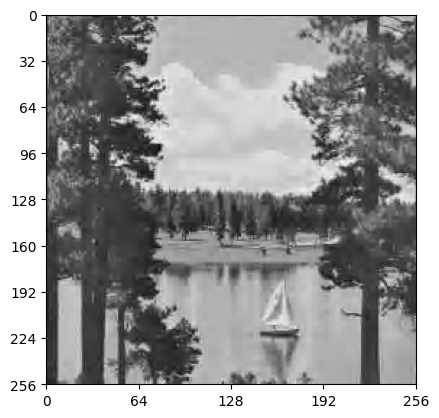

In [32]:
N = 4
M = 16
fdq = True

step = (minimize_scalar(objective_function_lbt2, bounds=(0, 100), args=(image, target_bits, fdq, N, M, True), method='bounded')).x

vlc, hufftab, totalbits = jpegenc_lbt2(image, step, fdq, N, M, opthuff=True)
print(totalbits)
Z = jpegdec_lbt2(vlc, step, fdq, N, M, hufftab=hufftab)
fig, ax = plt.subplots()
plot_image(Z, ax=ax);

In [33]:
rmse = np.std(Z-image)
ssim = ssim_comp(Z, image, data_range=256)
vif = vif_index(Z, image)
print(rmse, ssim, vif)

11.114079285530671 0.8164001906020387 0.41709031705392813


Forward 4 x 4 LBT
Second 4 x 4 LBT on low-pass image
Quantising to step size of 44.308854817923056
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 39532
Bits for huffman table = 1424
40956
Generating huffcode and ehuf using custom tables
Decoding rows
Inverse quantising to step size of 44.308854817923056
Inverting second 4 x 4 LBT
Inverse 4 x 4 LBT



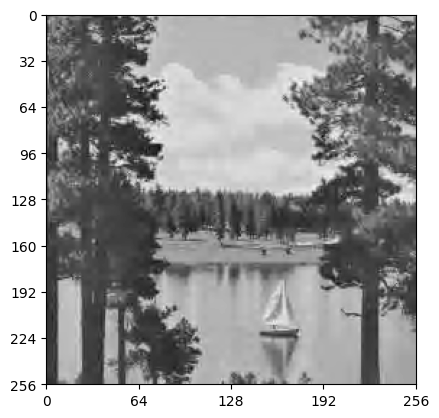

In [34]:
N = 4
M = 16
fdq = False

step = (minimize_scalar(objective_function_lbt2, bounds=(1, 100), args=(image, target_bits, fdq, N, M, True), method='bounded')).x

vlc, hufftab, totalbits = jpegenc_lbt2(image, step, fdq, N, M, opthuff=True)
print(totalbits)
Z = jpegdec_lbt2(vlc, step, fdq, N, M, hufftab=hufftab)
fig, ax = plt.subplots()
plot_image(Z, ax=ax);

In [35]:
rmse = np.std(Z-image)
ssim = ssim_comp(Z, image, data_range=256)
vif = vif_index(Z, image)
print(rmse, ssim, vif)

11.15970120381921 0.8181754542031109 0.4231427659478896


In [36]:
# import numpy as np
# from scipy.ndimage import gaussian_filter
# from PIL import Image
# import matplotlib.pyplot as plt

# def calculate_local_variance(image, filter_size=11):
#     # Apply Gaussian filter to get the local mean
#     local_mean = gaussian_filter(image, filter_size)
#     # Apply Gaussian filter to get the local squared mean
#     local_squared_mean = gaussian_filter(image ** 2, filter_size)
#     # Calculate local variance
#     local_variance = local_squared_mean - local_mean ** 2
#     return local_mean, local_variance

# def process_tiles(image, tile_size=64, filter_size=11):
#     height, width = image.shape
#     variance_map = np.zeros((height // tile_size, width // tile_size))

#     for i in range(0, height, tile_size):
#         for j in range(0, width, tile_size):
#             tile = image[i:i + tile_size, j:j + tile_size]
#             _, local_variance = calculate_local_variance(tile, filter_size)

#             mean_variance = np.mean(local_variance)
#             variance_map[i // tile_size, j // tile_size] = mean_variance

#     return variance_map

# # Define tile size
# tile_size = 64

# # Process the image to generate the variance map
# variance_map = process_tiles(image, tile_size, filter_size=11)

# # Normalize the variance map with respect to the top left tile variance
# top_left_variance = variance_map[0, 0]
# normalized_variance_map = variance_map / top_left_variance

# # Calculate the matrix of step sizes as the inverse square root of the normalized variance map
# step_size_map = 1 / np.sqrt(normalized_variance_map)

# # Display the normalized variance heatmap with values
# plt.figure(figsize=(10, 8))
# plt.imshow(normalized_variance_map, cmap='viridis')
# plt.title('Normalized Variance Heatmap')
# plt.colorbar(label='Variance Relative to Top Left Tile')

# # Annotate the heatmap with the variance values
# for i in range(normalized_variance_map.shape[0]):
#     for j in range(normalized_variance_map.shape[1]):
#         plt.text(j, i, f'{normalized_variance_map[i, j]:.2f}', ha='center', va='center', color='white')

# plt.show()

# # Display the step size heatmap with values
# plt.figure(figsize=(10, 8))
# plt.imshow(step_size_map, cmap='viridis')
# plt.title('Step Size Heatmap')
# plt.colorbar(label='Step Size (Inverse Square Root of Variance)')

# # Annotate the heatmap with the step size values
# for i in range(step_size_map.shape[0]):
#     for j in range(step_size_map.shape[1]):
#         plt.text(j, i, f'{step_size_map[i, j]:.2f}', ha='center', va='center', color='white')

# plt.show()


In [37]:
from cued_sf2_lab.jpeg_xr import jpegenc_xr, jpegdec_xr, objective_function_xr

SS: 110
Forward 4 x 4 LBT
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 11938
Bits for huffman table = 1424
13618
Generating huffcode and ehuf using custom tables
Decoding rows
Inverse quantising with step sizes.
Inverting second 4 x 4 LBT on each macroblock
Inverse 4 x 4 LBT on the entire image


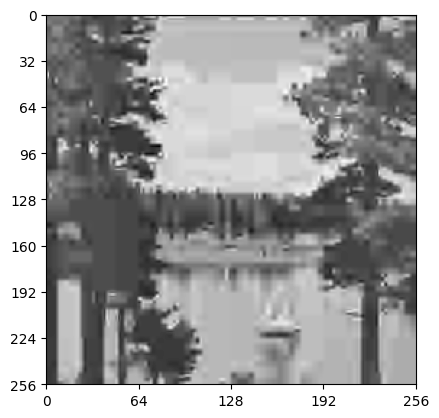

In [38]:
N = 4
M = 16

step = 110 #(minimize_scalar(objective_function_xr, bounds=(), args=(image, target_bits, N, M, True), method='bounded')).x
print('SS: {}'.format(step))

vlc, hufftab, ss_map, totalbits = jpegenc_xr(image, step, N, M, opthuff=True)
print(totalbits)
Z = jpegdec_xr(vlc, step, ss_map, N, M, hufftab=hufftab)
fig, ax = plt.subplots()
plot_image(Z, ax=ax);

In [39]:
from cued_sf2_lab.jpeg_xr_nonreg import jpegenc_xr, jpegdec_xr, objective_function_xr

SS: 100
Forward 4 x 4 LBT
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 13758
Bits for huffman table = 1424
15438
Generating huffcode and ehuf using custom tables
Decoding rows
Inverse quantising with step sizes.
Inverting second 4 x 4 LBT on each macroblock
Inverse 4 x 4 LBT on the entire image


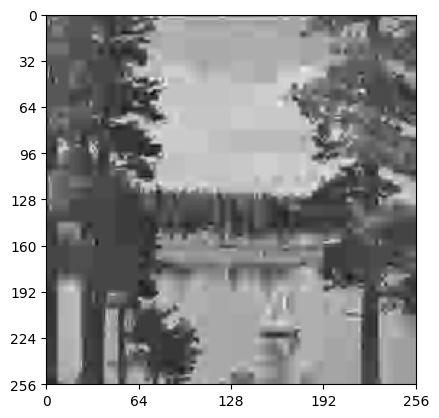

In [40]:
N = 4
M = 16

step = 100 #(minimize_scalar(objective_function_xr, bounds=(), args=(image, target_bits, N, M, True), method='bounded')).x
print('SS: {}'.format(step))

vlc, hufftab, ss_map, totalbits = jpegenc_xr(image, step, N, M, opthuff=True)
print(totalbits)
Z = jpegdec_xr(vlc, step, ss_map, N, M, hufftab=hufftab)
fig, ax = plt.subplots()
plot_image(Z, ax=ax);